In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from joblib import dump
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)
df.rename(columns={"v1": "Target", "v2": "text"}, inplace=True)
df.head()

,Target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df['Target'] = df['Target'].map({'ham':0, 'spam':1})
df.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


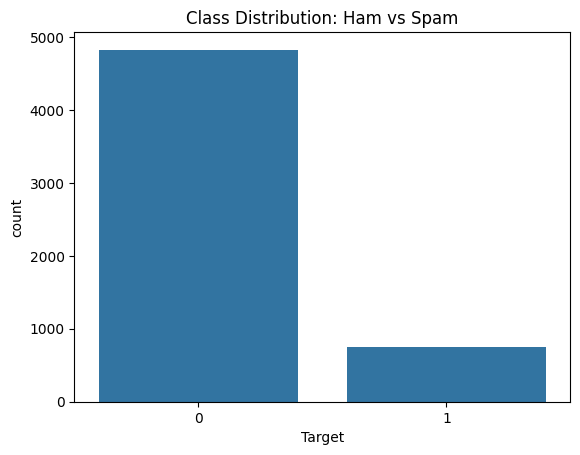

In [6]:
sns.countplot(x=df['Target'])
plt.title("Class Distribution: Ham vs Spam")
plt.show()

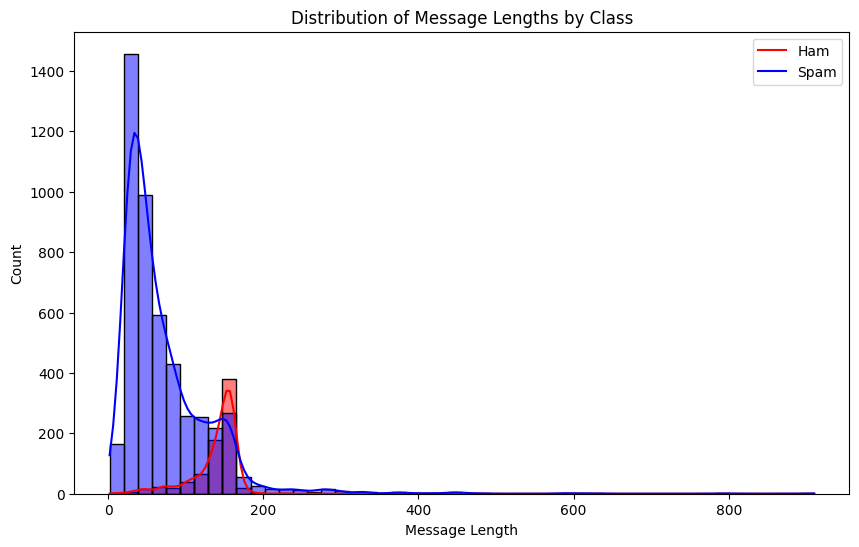

In [8]:
# Visualize the length of messages for ham vs spam
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='text_length', hue='Target', bins=50, kde=True, palette={0: 'blue', 1: 'red'})
plt.title('Distribution of Message Lengths by Class')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.legend(['Ham', 'Spam'])
plt.show()

In [9]:
# Display basic statistics of message lengths for ham and spam
ham_lengths = df[df['Target'] == 0]['text_length']
spam_lengths = df[df['Target'] == 1]['text_length']

print("Ham message length stats:")
print(ham_lengths.describe())
print("\nSpam message length stats:")
print(spam_lengths.describe())

Ham message length stats:
count    4825.000000
mean       71.023627
std        58.016023
min         2.000000
25%        33.000000
50%        52.000000
75%        92.000000
max       910.000000
Name: text_length, dtype: float64

Spam message length stats:
count    747.000000
mean     138.866131
std       29.183082
min       13.000000
25%      132.500000
50%      149.000000
75%      157.000000
max      224.000000
Name: text_length, dtype: float64


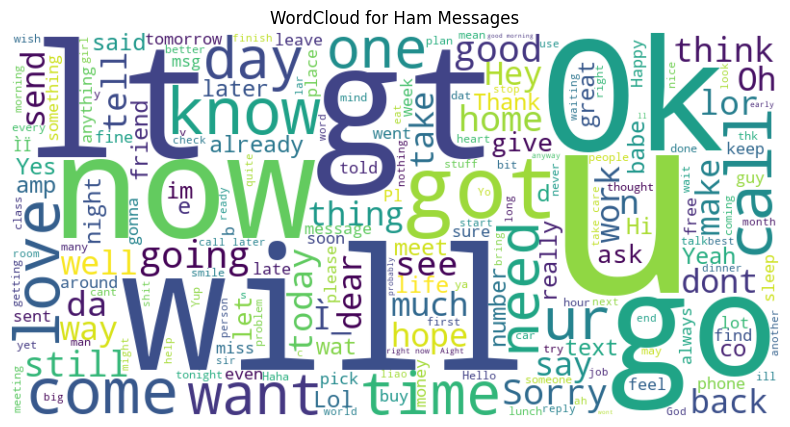

In [12]:
# Generate wordcloud for ham messages
ham_text = " ".join(df[df['Target'] == 0]['text'])
ham_wc = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

plt.figure(figsize=(10,5))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Ham Messages')
plt.show()


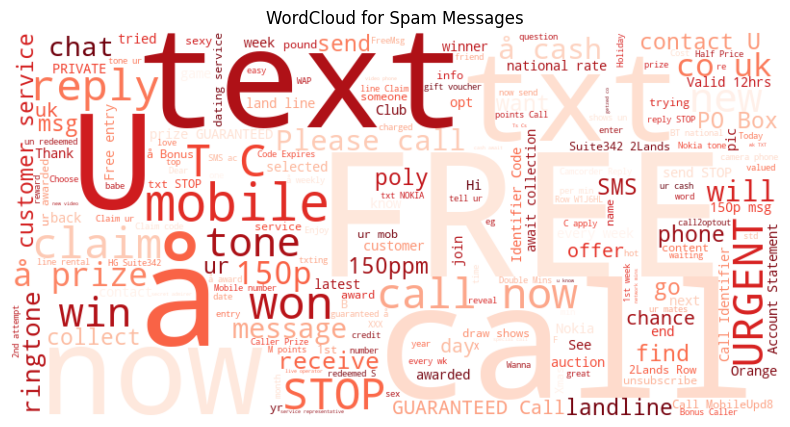

In [11]:
# Generate wordcloud for spam messages
spam_text = " ".join(df[df['Target'] == 1]['text'])
spam_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(spam_text)

plt.figure(figsize=(10,5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Spam Messages')
plt.show()

In [7]:
X = df['text']
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


📌 Model: Naive Bayes
Accuracy: 0.9668161434977578
              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       965
        Spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



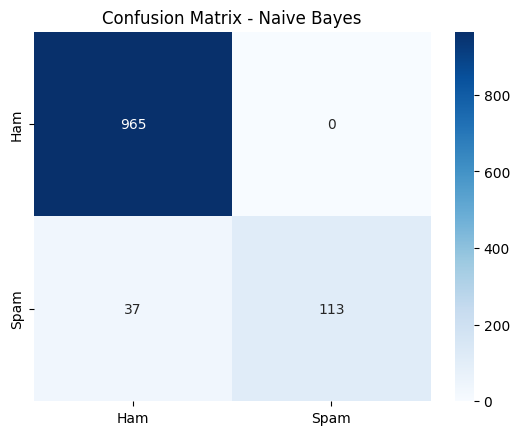


📌 Model: Logistic Regression
Accuracy: 0.9524663677130045
              precision    recall  f1-score   support

         Ham       0.95      1.00      0.97       965
        Spam       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



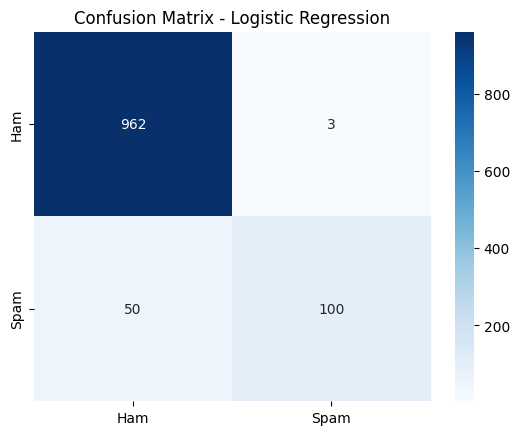


📌 Model: Linear SVM
Accuracy: 0.97847533632287
              precision    recall  f1-score   support

         Ham       0.98      0.99      0.99       965
        Spam       0.96      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



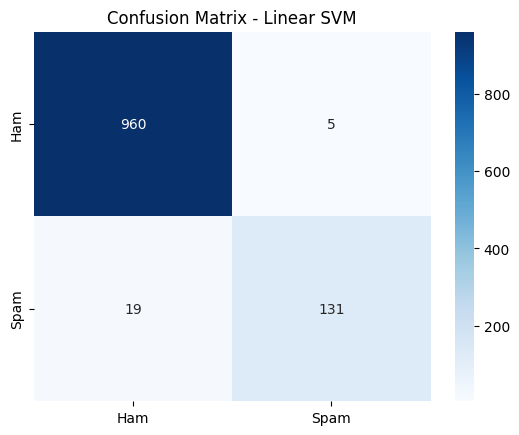

In [17]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n📌 Model: {name}")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred, target_names=['Ham','Spam']))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


📊 Model Comparison:
                 Model  Accuracy
0          Naive Bayes  0.966816
1  Logistic Regression  0.952466
2           Linear SVM  0.978475


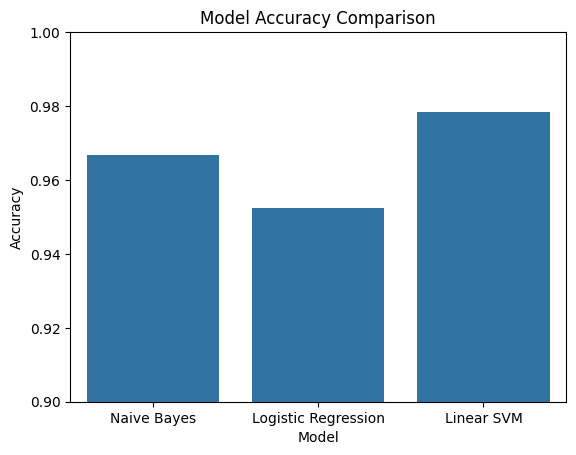

In [18]:
result_df = pd.DataFrame(list(results.items()), columns=['Model','Accuracy'])
print("\n📊 Model Comparison:")
print(result_df)

sns.barplot(x='Model', y='Accuracy', data=result_df)
plt.title("Model Accuracy Comparison")
plt.ylim(0.9,1.0)
plt.show()

In [20]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

dump(best_model, "spam_detector.joblib")
dump(vectorizer, "tfidf_vectorizer.joblib")

print(f"✅ Best Model Saved: {best_model_name}")

✅ Best Model Saved: Linear SVM
